In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
import pickle

In [3]:
# memuat Dataset
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA (Exploratory Data Analysis) #


In [4]:
#EDA untuk mengenali data secara mendalam
print("\n===== Data Info =====")
data.info()
print("\n===== Missing Values =====")
print(data.isnull().sum())


===== Data Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0        CustomerID         200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

===== Missing Values =====
     CustomerID           0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Ringkasan Statistik
print("\n===== Statistical Summary =====")
print(data.describe())


===== Statistical Summary =====
            CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count       200.000000  200.000000          200.000000              200.000000
mean        100.500000   38.850000           60.560000               50.200000
std          57.879185   13.969007           26.264721               25.823522
min           1.000000   18.000000           15.000000                1.000000
25%          50.750000   28.750000           41.500000               34.750000
50%         100.500000   36.000000           61.500000               50.000000
75%         150.250000   49.000000           78.000000               73.000000
max         200.000000   70.000000          137.000000               99.000000


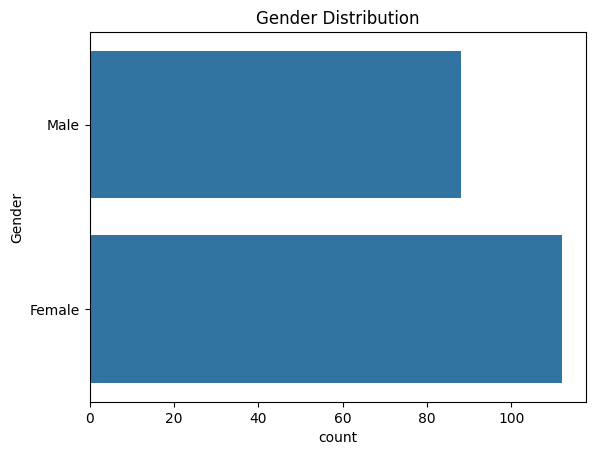

In [6]:
# Visualisasi
sns.countplot(data['Gender'])
plt.title("Gender Distribution")
plt.show()

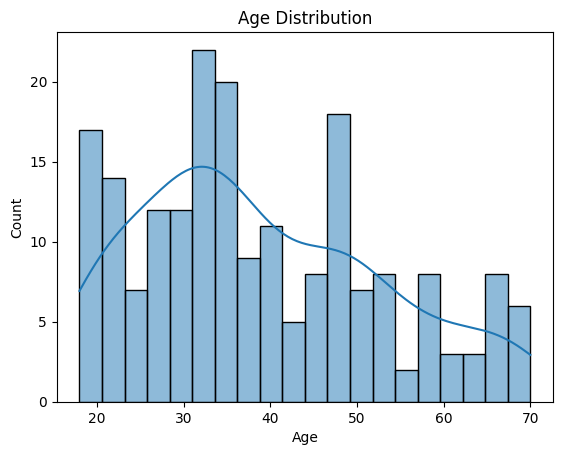

In [7]:
sns.histplot(data['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

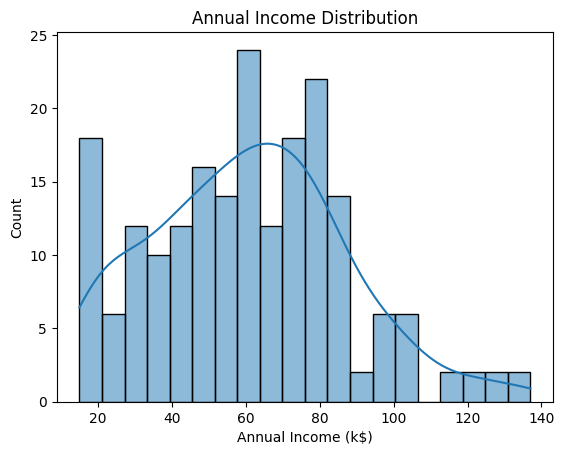

In [8]:
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title("Annual Income Distribution")
plt.show()

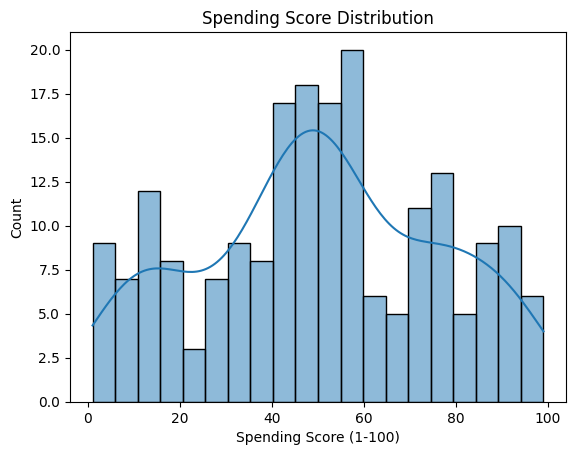

In [9]:
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title("Spending Score Distribution")
plt.show()

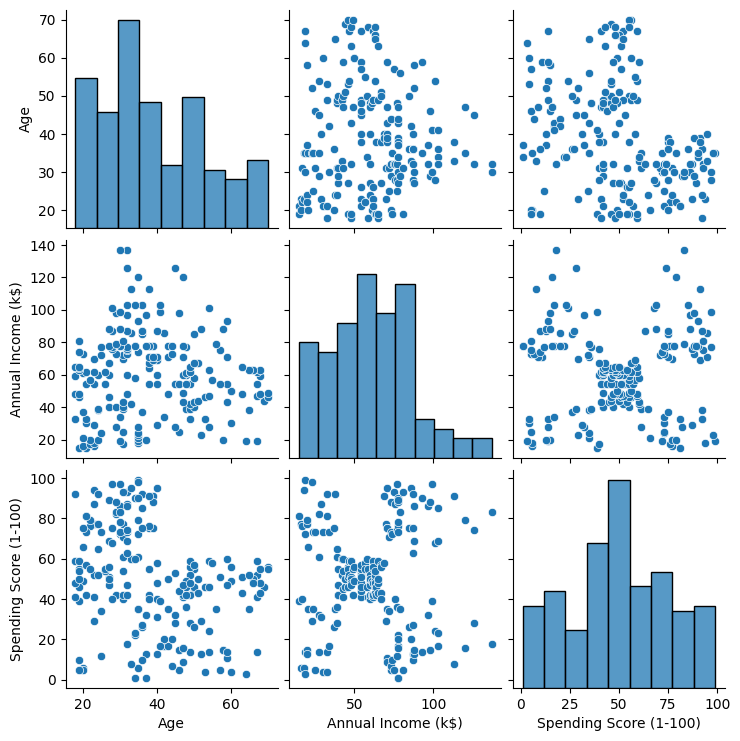

In [10]:
# Pairplot untuk Hubungan Antar Variabe
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


# Preprocessing Data #


In [27]:
# Encode Gender
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,4
4,5,0,31,17,40,4


In [12]:
# Memilih Fitur yang Relevan
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
# Normalisasi Fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
print("===== Selected Features =====")
print(features.head())


===== Selected Features =====
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


In [15]:
print("===== Scaled Features =====")
print(pd.DataFrame(scaled_features, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']).head())


===== Scaled Features =====
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


# Clustering with K-Means #

In [16]:
# Menentukan Jumlah Cluster Optimal dengan Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


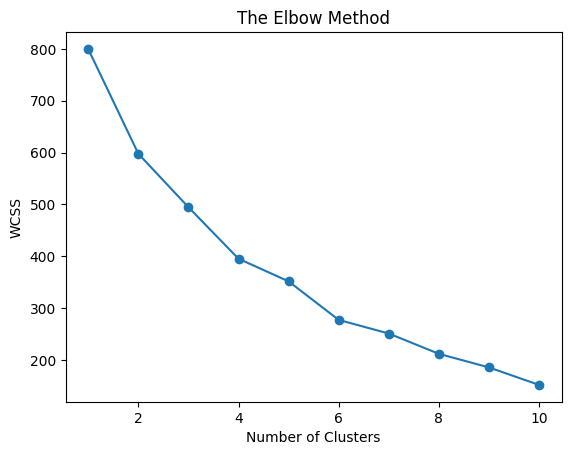

In [17]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Dari Plot Elbow, Asumsikan Jumlah Cluster Optimal = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_

In [19]:
# Evaluasi Menggunakan Silhouette Score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.27191023466188324


In [20]:
# Interpretasi Cluster
print("\n===== Cluster Centers =====")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_centers_df)



===== Cluster Centers =====
         Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  5.098039e-01  56.470588           46.098039               39.313725
1  1.000000e+00  39.500000           85.150000               14.050000
2  1.000000e+00  28.690476           60.904762               70.238095
3 -1.665335e-16  37.897959           82.122449               54.448980
4  1.665335e-16  27.315789           38.842105               56.210526


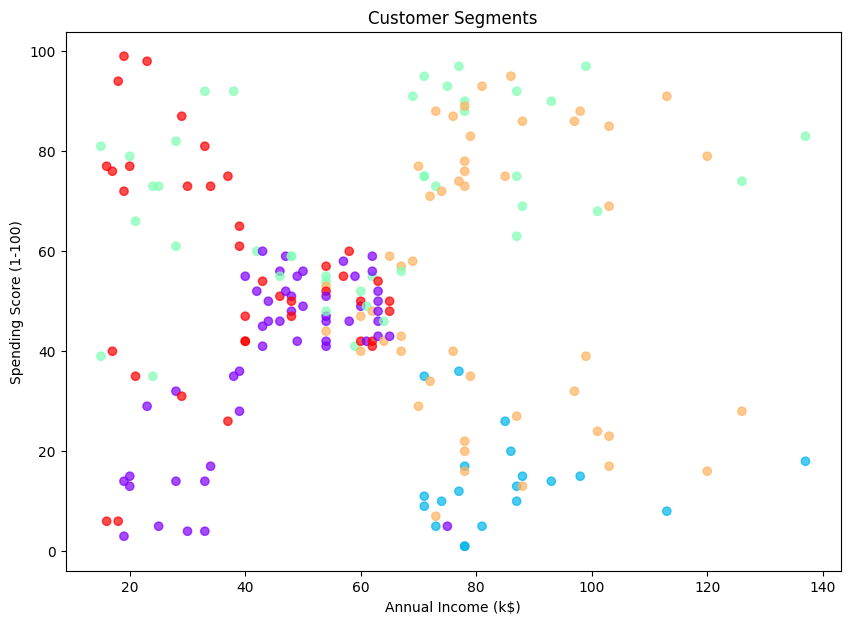

In [21]:
# Visualisasikan cluster
plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='rainbow', alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


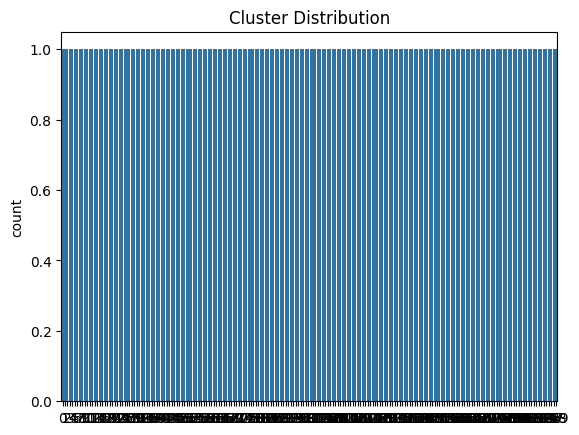

In [22]:
# Distribusi cluster
sns.countplot(data['Cluster'])
plt.title("Cluster Distribution")
plt.show()

# For Accuracy and Confusion Matrix #

In [23]:
# Untuk Akurasi dan Confusion Matrix
# Asumsi kita memiliki label asli (untuk tujuan evaluasi)
# Ganti 'true_labels' dengan label asli jika tersedia
true_labels = np.random.randint(0, 5, size=len(data))  # Label simulasi untuk demonstrasi

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, data['Cluster'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 8  2  6 13  7]
 [10  3  9 10  8]
 [12  5 11  7  9]
 [ 8  6  4  8 11]
 [13  4 12 11  3]]


In [25]:
# Menyimpan model dan scaler menggunakan pickle
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [26]:
# Cluster 0:
# Jumlah: 51 pelanggan
# Karakteristik:
# Rata-rata usia: 56 tahun (lebih tua dibandingkan cluster lain).
# Pendapatan tahunan: $46.1k (rendah-menengah).
# Skor belanja: 39 (rendah).

# Cluster 1:
# Jumlah: 20 pelanggan
# Karakteristik:
# Hanya pria.
# Usia rata-rata: 39 tahun.
# Pendapatan tahunan: $85.15k (tinggi).
# Skor belanja: 14 (sangat rendah, mungkin pelanggan hemat).

# Cluster 2:
# Jumlah: 42 pelanggan
# Karakteristik:
# Hanya pria.
# Usia rata-rata: 28 tahun (generasi muda).
# Pendapatan tahunan: $60.9k (menengah).
# Skor belanja: 70 (tinggi, cenderung sering belanja).

# Cluster 3:
# Jumlah: 49 pelanggan
# Karakteristik:
# Hanya wanita.
# Usia rata-rata: 38 tahun.
# Pendapatan tahunan: $82.12k (tinggi).
# Skor belanja: 54 (sedang-tinggi).

# Cluster 4:
# Jumlah: 38 pelanggan
# Karakteristik:
# Hanya wanita.
# Usia rata-rata: 27 tahun (termuda).
# Pendapatan tahunan: $38.8k (rendah).
# Skor bSelanja: 56 (sedang).